# Car Price Prediction

###### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

In [2]:
df=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
df.shape

(4340, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
for feature in df.columns:
    print("Unique features in {} are {}".format(feature,df[feature].nunique()))

Unique features in name are 1491
Unique features in year are 27
Unique features in selling_price are 445
Unique features in km_driven are 770
Unique features in fuel are 5
Unique features in seller_type are 3
Unique features in transmission are 2
Unique features in owner are 5


In [9]:
df["name"]=df["name"].str.split(" ").str[0]

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


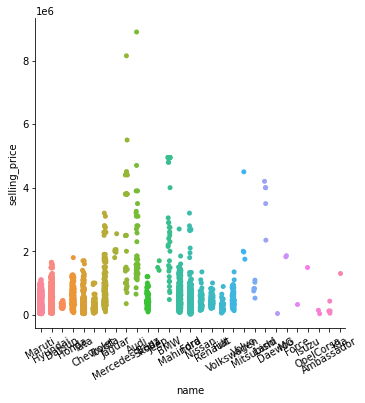

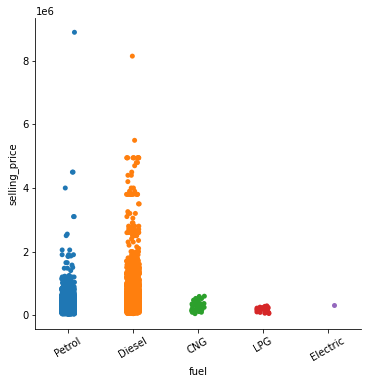

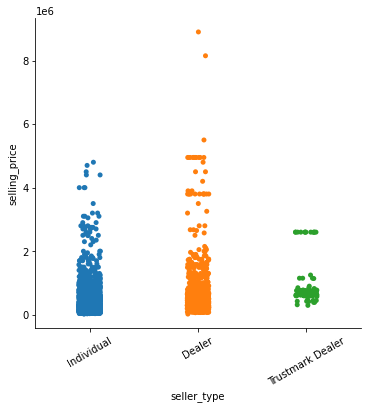

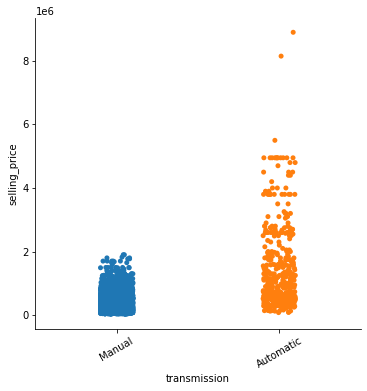

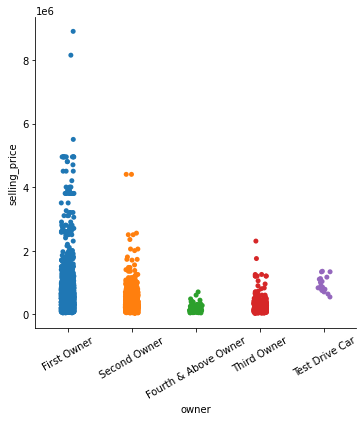

In [10]:
for feature in ["name","fuel","seller_type","transmission","owner"]:  
    g = sns.catplot(data=df,x=feature,y="selling_price")
    g.set_xticklabels(rotation=30)


<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

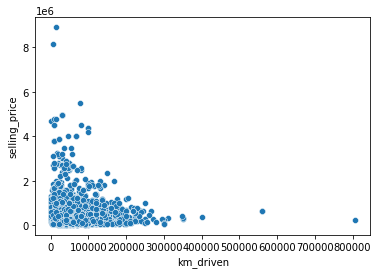

In [11]:
sns.scatterplot(data=df,x="km_driven",y="selling_price")

In [12]:
#Since selling_price more then 5200000 act as outliers so removed those to get a better price prediction

df=df[df["selling_price"]<5200000]

In [13]:
# Since their is only one Electric car present , so its better to remove that data

df=df[df["fuel"]!="Electric"]
df=df[df["fuel"]!="CNG"]
df=df[df["fuel"]!="LPG"]
df=df[df["seller_type"]!="Trustmark Dealer"]
df=df[df["owner"]!="Test Drive Car"]
df=df[df["owner"]!="Fourth & Above Owner"]

In [14]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [15]:
df.shape

(4077, 8)

In [16]:
df["year"]=2020-df["year"]

In [17]:
#df["selling_price"]=np.log(df["selling_price"])

In [18]:
df=pd.get_dummies(df,columns=["fuel","seller_type","transmission","owner"])

In [19]:
df.head()

,name,year,selling_price,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Second Owner,owner_Third Owner
0,Maruti,13,60000,70000,0,1,0,1,0,1,1,0,0
1,Maruti,13,135000,50000,0,1,0,1,0,1,1,0,0
2,Hyundai,8,600000,100000,1,0,0,1,0,1,1,0,0
3,Datsun,3,250000,46000,0,1,0,1,0,1,1,0,0
4,Honda,6,450000,141000,1,0,0,1,0,1,0,1,0


In [20]:
df["name"].value_counts().sort_values(ascending=False)

Maruti           1143
Hyundai           776
Mahindra          357
Tata              353
Honda             242
Ford              220
Toyota            187
Chevrolet         183
Renault           143
Volkswagen        104
Skoda              67
Nissan             64
Audi               59
BMW                39
Datsun             37
Fiat               36
Mercedes-Benz      33
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
Kia                 1
Force               1
Isuzu               1
Daewoo              1
OpelCorsa           1
Name: name, dtype: int64

In [21]:
# # Since top 17 features are mostly used and also contain most used car brands in india so took into consideration those brands only

# top_17=df["name"].value_counts().sort_values(ascending=False).head(17).index

In [22]:
# for brand in top_17:
#     df[brand]=np.where(df["name"]==brand,1,0)

In [23]:
df=df[df["name"].isin(["Maruti","Hyundai","Mahindra","Tata","Honda","Ford","Toyota"])]

In [24]:
df.shape

(3278, 13)

In [25]:
df=df.iloc[:450]

In [26]:
df=pd.get_dummies(data=df,columns=["name"])

In [27]:
df.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Second Owner,owner_Third Owner,name_Ford,name_Honda,name_Hyundai,name_Mahindra,name_Maruti,name_Tata,name_Toyota
0,13,60000,70000,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0
1,13,135000,50000,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0
2,8,600000,100000,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0
4,6,450000,141000,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0
5,13,140000,125000,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0


In [28]:
#df.drop(columns=["name"],inplace=True)

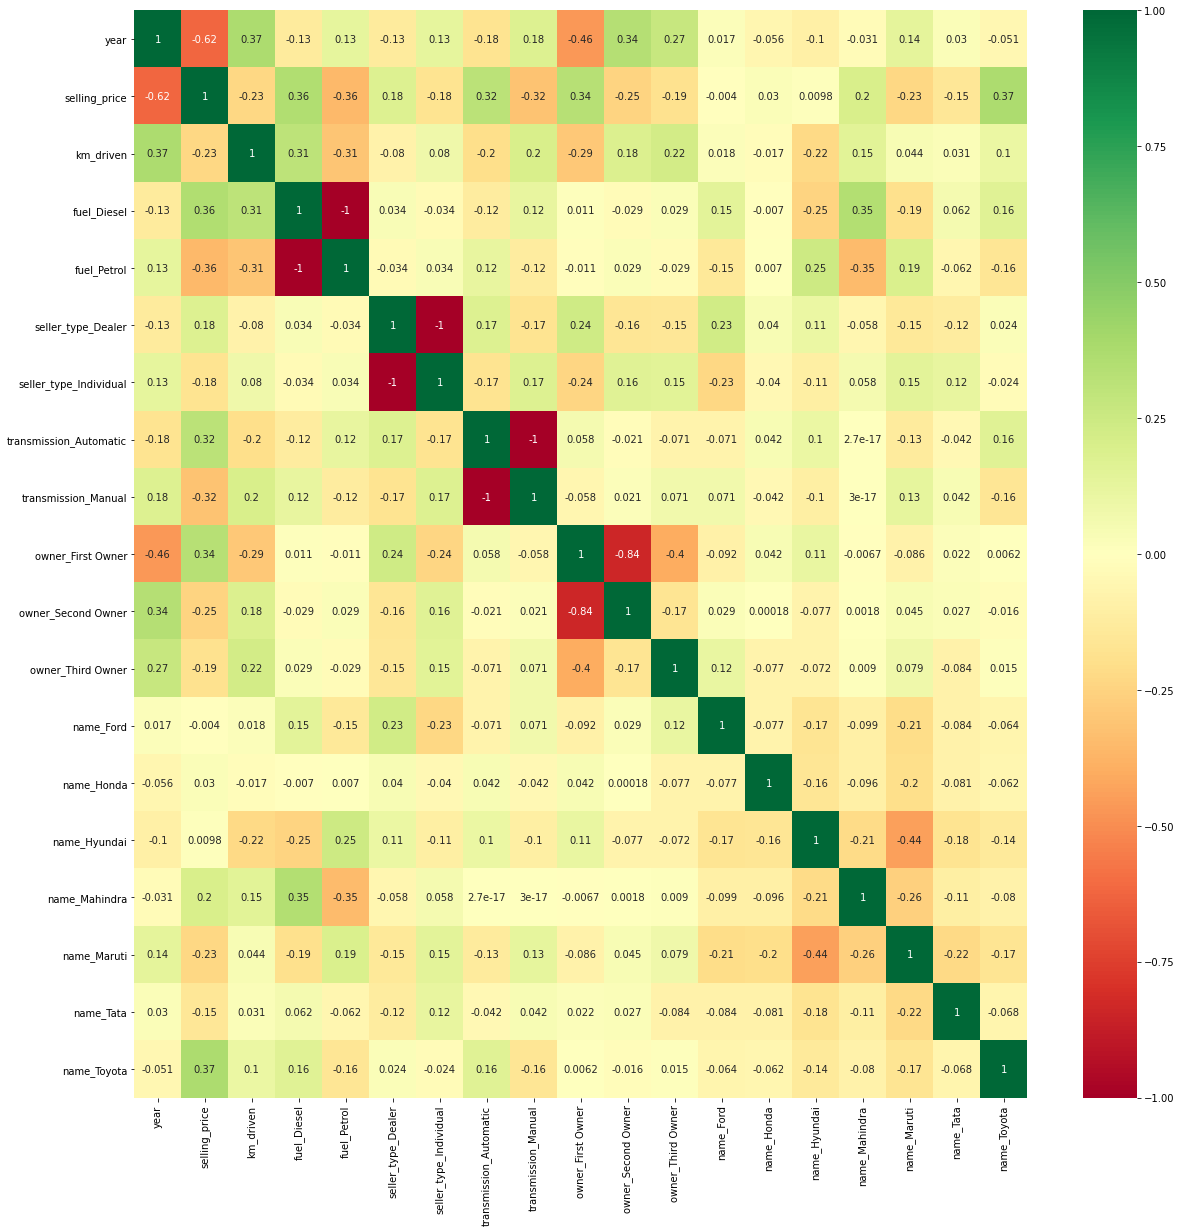

In [29]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [30]:
X=df.drop(labels=["selling_price"],axis=1)
y=df["selling_price"].values

In [31]:
X.head()

,year,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Second Owner,owner_Third Owner,name_Ford,name_Honda,name_Hyundai,name_Mahindra,name_Maruti,name_Tata,name_Toyota
0,13,70000,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0
1,13,50000,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0
2,8,100000,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0
4,6,141000,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0
5,13,125000,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0


In [32]:
X.columns

Index(['year', 'km_driven', 'fuel_Diesel', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner', 'owner_Second Owner',
       'owner_Third Owner', 'name_Ford', 'name_Honda', 'name_Hyundai',
       'name_Mahindra', 'name_Maruti', 'name_Tata', 'name_Toyota'],
      dtype='object')

In [33]:
X=X[['name_Maruti', 'name_Hyundai', 'name_Mahindra', 'name_Tata', 'name_Honda', 'name_Ford', 'name_Toyota','fuel_Diesel',
       'fuel_Petrol','transmission_Automatic',
       'transmission_Manual','seller_type_Dealer', 'seller_type_Individual',
       'owner_First Owner',
       'owner_Second Owner', 'owner_Third Owner','year', 'km_driven']]

In [34]:
X.head()

,name_Maruti,name_Hyundai,name_Mahindra,name_Tata,name_Honda,name_Ford,name_Toyota,fuel_Diesel,fuel_Petrol,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,owner_First Owner,owner_Second Owner,owner_Third Owner,year,km_driven
0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,13,70000
1,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,13,50000
2,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,8,100000
4,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,6,141000
5,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,13,125000


In [35]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [36]:
print(model.feature_importances_)

[0.01517523 0.01179482 0.02045005 0.02066361 0.00578902 0.00310616
 0.14434052 0.04919812 0.04776321 0.03312574 0.03240467 0.02352556
 0.02185215 0.03424361 0.00598372 0.00210967 0.40700726 0.12146686]


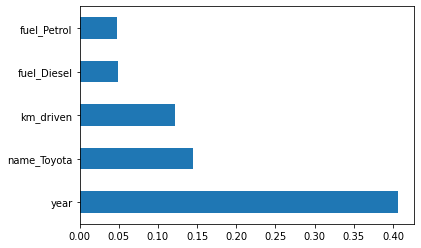

In [37]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
regressor=RandomForestRegressor()

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [43]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [45]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [46]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   43.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [48]:
rf_random.best_score_

-40833913171.87239

In [49]:
predictions=rf_random.predict(X_test)

In [50]:
predictions

array([ 288772.97680952,  318673.12333333,  458781.35314286,
        478204.665     ,  153814.995     ,  180804.32233333,
        575998.41266667,  560517.        ,  472302.454     ,
        568746.64066667,  469516.983     ,  559266.62366667,
        644971.992     ,  505314.33033333,  491092.        ,
        866769.999     ,  428998.        ,  124981.66366667,
         80620.        ,  590747.79633333,  344775.13133333,
        653722.499     ,  231867.38733333,  628101.70208333,
        559254.20945   ,  558805.495     ,  549086.        ,
        789239.995     ,  573849.999     ,  523044.996     ,
        759660.79387143,  369012.985     ,  832988.999     ,
        582571.999     ,  176229.96      ,  736500.998     ,
        516973.57980952,  835068.299     ,  350218.32733333,
        331317.66566667,  140213.33233333,  699609.991     ,
        128180.32133333,  203975.49933333,  322562.5       ,
        433538.02833333,  393131.62166667,  169821.996     ,
        637149.999     ,

/home/anshul/anaconda3/envs/carprediction/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

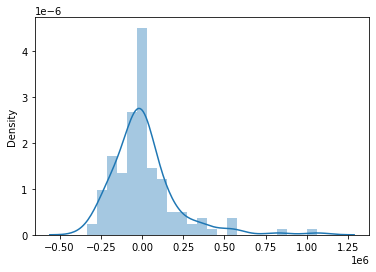

In [51]:
sns.distplot(y_test-predictions)

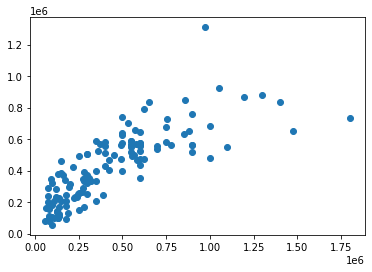

In [52]:
plt.scatter(y_test,predictions)

In [53]:
from sklearn import metrics

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 127828.59583807761
MSE: 39552365739.67144
RMSE: 198877.76582532155


In [55]:
import pickle
# open a file, where you ant to store the data
file = open('car_price_prediction_model1.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [56]:
model = open('car_price_prediction_model1.pkl','rb')
forest = pickle.load(model)

In [57]:
y_prediction = forest.predict(X_test)

In [58]:
metrics.r2_score(y_test, y_prediction)

0.6296182651377753